In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/sweatshirt.csv')

In [3]:
# with rate, vote, verified, asin, reviewText
df = df.iloc[:, [2,3,4,7,10]]

In [4]:
df_exclude_vote = df.drop(['vote'], axis = 1)
df_exclude_vote.dropna(inplace = True)
df_exclude_vote

,overall,verified,asin,reviewText
0,4,True,B000BRFH1E,Good price.\nComfortable.\nArrived on time.\nI...
1,4,True,B000BRFH1E,"I bought the brown hoodie, thank goodness! It ..."
2,2,True,B000BRFH1E,It was way to small to be a 4x. I gave a 3x in...
3,5,True,B000BRFH1E,This was Great for a cheeper hoodie. It is har...
4,3,True,B000BRFH1E,I think I was looking for something that had m...
...,...,...,...,...
21538,5,True,B009OCZ84I,Good for price. Doesn't shrink.. XL stays XL s...
21539,5,True,B009OCZ84I,The sweatshirt is great. I purchased two :)
21540,5,True,B009OCZ84I,Great product
21541,4,True,B009OCZ84I,My only issue is that its a little tight aroun...


In [5]:
# vectorize
review = df_exclude_vote.iloc[:,3]
vectorizer = TfidfVectorizer()
review_vector = vectorizer.fit_transform(review).todense()

In [6]:
#clustering
KM = KMeans(n_clusters = 10, random_state = 42)
c = KM.fit_predict(review_vector)
c = pd.Series(c, name = 'cluster')

In [7]:
# combine
dfc = pd.DataFrame(review_vector)

In [8]:
dfc = pd.concat([dfc,c],axis = 1)

In [9]:
dfc

,0,1,2,3,4,5,6,7,8,9,...,6013,6014,6015,6016,6017,6018,6019,6020,6021,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
21503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
21504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
21505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [10]:
# devide each cluster
cluster0_index = dfc.loc[dfc['cluster'] == 0].index
cluster1_index = dfc.loc[dfc['cluster'] == 1].index
cluster2_index = dfc.loc[dfc['cluster'] == 2].index
cluster3_index = dfc.loc[dfc['cluster'] == 3].index
cluster4_index = dfc.loc[dfc['cluster'] == 4].index
cluster5_index = dfc.loc[dfc['cluster'] == 5].index
cluster6_index = dfc.loc[dfc['cluster'] == 6].index
cluster7_index = dfc.loc[dfc['cluster'] == 7].index
cluster8_index = dfc.loc[dfc['cluster'] == 8].index
cluster9_index = dfc.loc[dfc['cluster'] == 9].index

In [11]:
cluster0 = review.iloc[cluster0_index].to_frame()
cluster1 = review.iloc[cluster1_index].to_frame()
cluster2 = review.iloc[cluster2_index].to_frame()
cluster3 = review.iloc[cluster3_index].to_frame()
cluster4 = review.iloc[cluster4_index].to_frame()
cluster5 = review.iloc[cluster5_index].to_frame()
cluster6 = review.iloc[cluster6_index].to_frame()
cluster7 = review.iloc[cluster7_index].to_frame()
cluster8 = review.iloc[cluster8_index].to_frame()
cluster9 = review.iloc[cluster9_index].to_frame()

In [12]:
cluster_list = [cluster0, cluster1, cluster2,
                cluster3, cluster4, cluster5,
                cluster6, cluster7, cluster8,
                cluster9]

In [13]:
def features_idf(cluster):
    vectorizer.fit(cluster)
    dct = {}
    for a, b in zip(vectorizer.vocabulary_,vectorizer.idf_):
        dct[a] = b
    result = sorted(dct.items(), reverse = True, key = lambda item: item[1])
    return result
result_list = []
for cluster in cluster_list:
#     result_list.append(features_idf(cluster['reviewText'])[0:10])
    result_list.append(features_idf(cluster['reviewText'])[-10:])
result_list

[[('so', 3.589938163962352),
  ('complaints', 3.409811997731833),
  ('white', 3.3357040255781114),
  ('pictured', 3.315501318260592),
  ('when', 3.1757393758854335),
  ('bright', 3.141548011137154),
  ('satisfied', 2.79077278932561),
  ('perfect', 2.7221744729828576),
  ('layering', 2.161769730371403),
  ('cozy', 1.0)],
 [('wearing', 3.681021528714291),
  ('feels', 3.6528506517475945),
  ('its', 3.429707100433385),
  ('winter', 3.3651685792958137),
  ('soft', 3.211017899468555),
  ('sweater', 3.002263085606445),
  ('it', 2.9056362499173733),
  ('house', 2.866921737736683),
  ('im', 1.2935702150770034),
  ('my', 1.0)],
 [('magnificently', 2.1023199717134684),
  ('sowed', 2.0547874056976263),
  ('attract', 1.9190213752716874),
  ('sh', 1.8487922890464756),
  ('carrying', 1.8103947149012902),
  ('triple', 1.717197225975072),
  ('paying', 1.591025249780086),
  ('adorable', 1.5574755010983585),
  ('feel', 1.3308007767546013),
  ('cases', 1.046853979792511)],
 [('power', 2.3047834399980536),

# LDA topic model

In [172]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer('english')

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenstar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
## Words that have fewer than 3 characters are removed. 
## All stopwords are removed. 
## Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present. 
## Words are stemmed — words are reduced to their root form.

In [257]:
# preprocessing function
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def preprocess(text, min_token_size):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > min_token_size:
            result.append(lemmatize_stemming(token))
    return result

In [270]:
def to_topic(cluster, size, num_of_topics):
    cluster_processed = cluster['reviewText'].apply(preprocess, args = (size,)) # preprocess
    dct_cluster = gensim.corpora.Dictionary(cluster_processed) # words dictionary
    bow_corpus_cluster = [dct_cluster.doc2bow(doc) for doc in cluster_processed] # bag of words corpus
    lda_model = gensim.models.LdaMulticore(bow_corpus_cluster, num_topics=num_of_topics, id2word=dct_cluster, passes=2)
    return lda_model.print_topics()

In [278]:
clusters_topic_list = []
for cluster in cluster_list:
    clusters_topic_list.append(to_topic(cluster,3,1))
clusters_topic_list

[[(0,
   '0.407*"good" + 0.106*"qualiti" + 0.058*"price" + 0.036*"product" + 0.034*"fit" + 0.024*"great" + 0.019*"look" + 0.016*"hoodi" + 0.014*"materi" + 0.013*"valu"')],
 [(0,
   '0.433*"love" + 0.061*"great" + 0.043*"fit" + 0.035*"hoodi" + 0.034*"sweatshirt" + 0.030*"color" + 0.026*"warm" + 0.022*"comfi" + 0.020*"soft" + 0.015*"perfect"')],
 [(0,
   '0.028*"hoodi" + 0.024*"size" + 0.020*"sweatshirt" + 0.018*"like" + 0.018*"color" + 0.016*"order" + 0.015*"wear" + 0.015*"price" + 0.015*"good" + 0.015*"great"')],
 [(0,
   '0.033*"love" + 0.030*"like" + 0.025*"fit" + 0.020*"wear" + 0.020*"size" + 0.018*"hoodi" + 0.018*"order" + 0.017*"perfect" + 0.016*"great" + 0.016*"buy"')],
 [(0,
   '0.128*"comfort" + 0.080*"warm" + 0.069*"soft" + 0.038*"great" + 0.032*"fit" + 0.029*"hoodi" + 0.023*"nice" + 0.023*"love" + 0.022*"perfect" + 0.020*"comfi"')],
 [(0,
   '0.186*"expect" + 0.065*"fit" + 0.036*"great" + 0.032*"good" + 0.026*"exact" + 0.024*"qualiti" + 0.021*"soft" + 0.018*"hoodi" + 0.018*"c

In [282]:
to_topic(review.to_frame(),3,10)

[(0,
  '0.063*"comfort" + 0.057*"soft" + 0.048*"warm" + 0.029*"like" + 0.024*"buy" + 0.023*"fit" + 0.022*"insid" + 0.020*"size" + 0.017*"wash" + 0.017*"great"'),
 (1,
  '0.058*"size" + 0.055*"perfect" + 0.046*"order" + 0.037*"small" + 0.028*"hoodi" + 0.027*"larg" + 0.022*"littl" + 0.021*"great" + 0.020*"fit" + 0.019*"qualiti"'),
 (2,
  '0.040*"wear" + 0.038*"size" + 0.034*"buy" + 0.033*"medium" + 0.032*"like" + 0.022*"fit" + 0.020*"larg" + 0.019*"small" + 0.014*"hoodi" + 0.011*"good"'),
 (3,
  '0.152*"great" + 0.035*"hoodi" + 0.028*"price" + 0.027*"wash" + 0.025*"comfort" + 0.021*"heavi" + 0.021*"look" + 0.020*"sweatshirt" + 0.016*"fast" + 0.015*"fit"'),
 (4,
  '0.089*"love" + 0.051*"nice" + 0.041*"hoodi" + 0.027*"great" + 0.027*"wash" + 0.022*"excel" + 0.021*"good" + 0.017*"qualiti" + 0.014*"perfect" + 0.014*"expect"'),
 (5,
  '0.048*"sweatshirt" + 0.044*"nice" + 0.026*"like" + 0.025*"expect" + 0.024*"fit" + 0.022*"hoodi" + 0.022*"price" + 0.022*"good" + 0.016*"love" + 0.016*"wear"'),

In [ ]:
# predictors = ['color', 'size', 'qualiti', 'comfi/comfort', 'price', 'materi']

# TF-IDF with Kmeans Clustering

In [6]:
X = df[['overall','asin','reviewText']]
X = X.dropna()

In [7]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X_vector = vectorizer.fit_transform(X['reviewText'])

In [22]:
X_vector = X_vector.toarray()

In [23]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_vector)

In [24]:
label = kmeans.labels_
df1 = pd.DataFrame(X_vector)
df1['label'] = label

In [25]:
df_feature = pd.DataFrame(vectorizer.get_feature_names())

In [26]:
list1 = []
for i in range(0,10):
    list1.append(df1[df1['label']==i])  # separate each label

In [27]:
features = defaultdict(list)
for i in range(0,10):
    temp = list1[i].drop(columns=['label'])
    temp = pd.DataFrame({'tfidf':temp.max()})
    temp = temp.sort_values(by='tfidf',ascending=False)
    max_tfidf = temp[temp['tfidf']==temp['tfidf'].max()]
    for j in max_tfidf.index:
        features[i].append(df_feature.iloc[j][0])

In [28]:
features[0] # key features: size, material, comfort,color

['bulky',
 'genial',
 'thanks',
 'right',
 'coo',
 'thicker',
 'hoped',
 'returned',
 'white',
 'thank',
 'return',
 'add',
 'gift',
 'hoodie',
 'thumbs',
 'content',
 'hot',
 'cool',
 'dope',
 'wonderful',
 'says',
 'satisfied',
 'amazing',
 'alright',
 'sweet',
 'bs',
 'need',
 'wish',
 'ilikeitalot',
 'bueno',
 'ripped',
 'rip',
 'hshshshshsjs',
 'advertised',
 'noice',
 'holes',
 'eh',
 'want',
 'really',
 'warming',
 'excelent',
 'excelente',
 'goodb',
 'wanted',
 'excellence',
 'torn',
 'excellent',
 'comforable',
 'vien',
 'perefect',
 'quality',
 'exellent',
 'grrreat',
 'gusto',
 'complaints',
 'recomended',
 'happy',
 'harmless',
 'ordering',
 'hdufivncvi',
 'tthank',
 'wavy',
 'order',
 'orange',
 'a1',
 'purchase',
 'confortable',
 'okay',
 'buy',
 'fuzballs',
 'aight',
 'awesome',
 'lightbweight',
 'problems',
 '10',
 'shrink',
 'liked',
 'soso',
 'likes',
 'mailbox',
 'yup',
 'write',
 'shrunk',
 'wrong',
 'soft',
 'snuggly',
 'shame',
 'fits',
 'bad',
 'dafawsfawsfgsgfg'

In [29]:
features[1] # key feature: size

['little', 'large', 'small', 'like', 'big', 'ordered']

In [30]:
features[2] # key features: comfort, warm

['comfortable', 'warm']

In [31]:
features[3]

['expected']

In [32]:
features[4]

['nice']

In [33]:
features[5]

['perfect']

In [34]:
features[6]

['good']

In [35]:
features[7]

['great']

In [36]:
features[8]  # key feature: comfy

['comfy', 'ok']

In [37]:
features[9]

['love']

In [38]:
# features = [size, material, comfort, warm, color]

**Therefore, we choos the common features: "color","size","comfort","material","price","quality"**

# Evaluate the six categories

In [39]:
df_1200 = pd.read_csv('data/1200.csv')

In [40]:
y = df_1200['overall']
X = df_1200.iloc[:,1:7]

In [45]:
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
R2 = lr.score(X,y)
MAE = mean_absolute_error(y, y_pred)
print("The R square of Linear Regression model is:", R2)
print("The MAE of Linear Regression model is:", MAE)

The R square of Linear Regression model is: 0.4882592494730197
The MAE of Linear Regression model is: 0.6275222901360613


In [46]:
model = DecisionTreeRegressor(random_state = 0)
params = {'max_features':['auto', 'sqrt'], 
          'max_depth':[i for i in range(3,10)]}
grid = GridSearchCV(model,param_grid = params, cv = 5)
grid.fit(X,y)
print(grid.best_params_)

y_pred = grid.predict(X)
R2 = grid.score(X,y)
MAE = mean_absolute_error(y, y_pred)
print("The R square of Drcision Tree Regression model is:", R2)
print("The MAE of Decision Tree Regression model is:", MAE)

{'max_depth': 7, 'max_features': 'sqrt'}
The R square of Drcision Tree Regression model is: 0.6356336708099337
The MAE of Decision Tree Regression model is: 0.4781991275352623


**Decision Tree Regression model is much better, let''s see the importance level if each category**

In [47]:
model = DecisionTreeRegressor(random_state = 0,
                              max_features = 'sqrt', 
                              max_depth=7)
model.fit(X,y)
model.feature_importances_

array([0.06381757, 0.47645814, 0.24346849, 0.07615611, 0.02355121,
       0.11654849])

In [48]:
df_importance = pd.DataFrame(100*model.feature_importances_,
                   index = X.columns,
                   columns=['importance'])
df_importance = df_importance.sort_values(by = 'importance',axis=0,
                      ascending=True)
df_importance

,importance
price,2.355121
color,6.381757
comfort,7.615611
materi,11.654849
qualiti,24.346849
size,47.645814


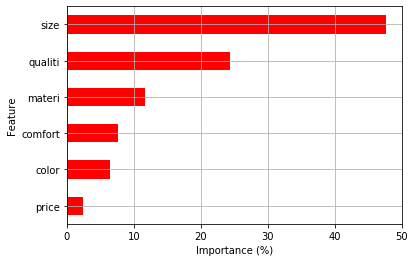

In [52]:
df_importance.plot(kind='barh',color='r',legend = False)
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.grid()